In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Operation cancelled by user


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WineQT.csv to WineQT.csv


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from sklearn import svm


In [ ]:
wine_df = pd.read_csv('WineQT.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine_df.columns #Column isimleri

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
print("Data types: \n{}".format(wine_df.dtypes)) #Columnlarda hangi veri tipi kullanılmış

Data types: 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [ ]:
wine_df.isnull().sum() #Boş column yok

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# **Violin Plot Explained**

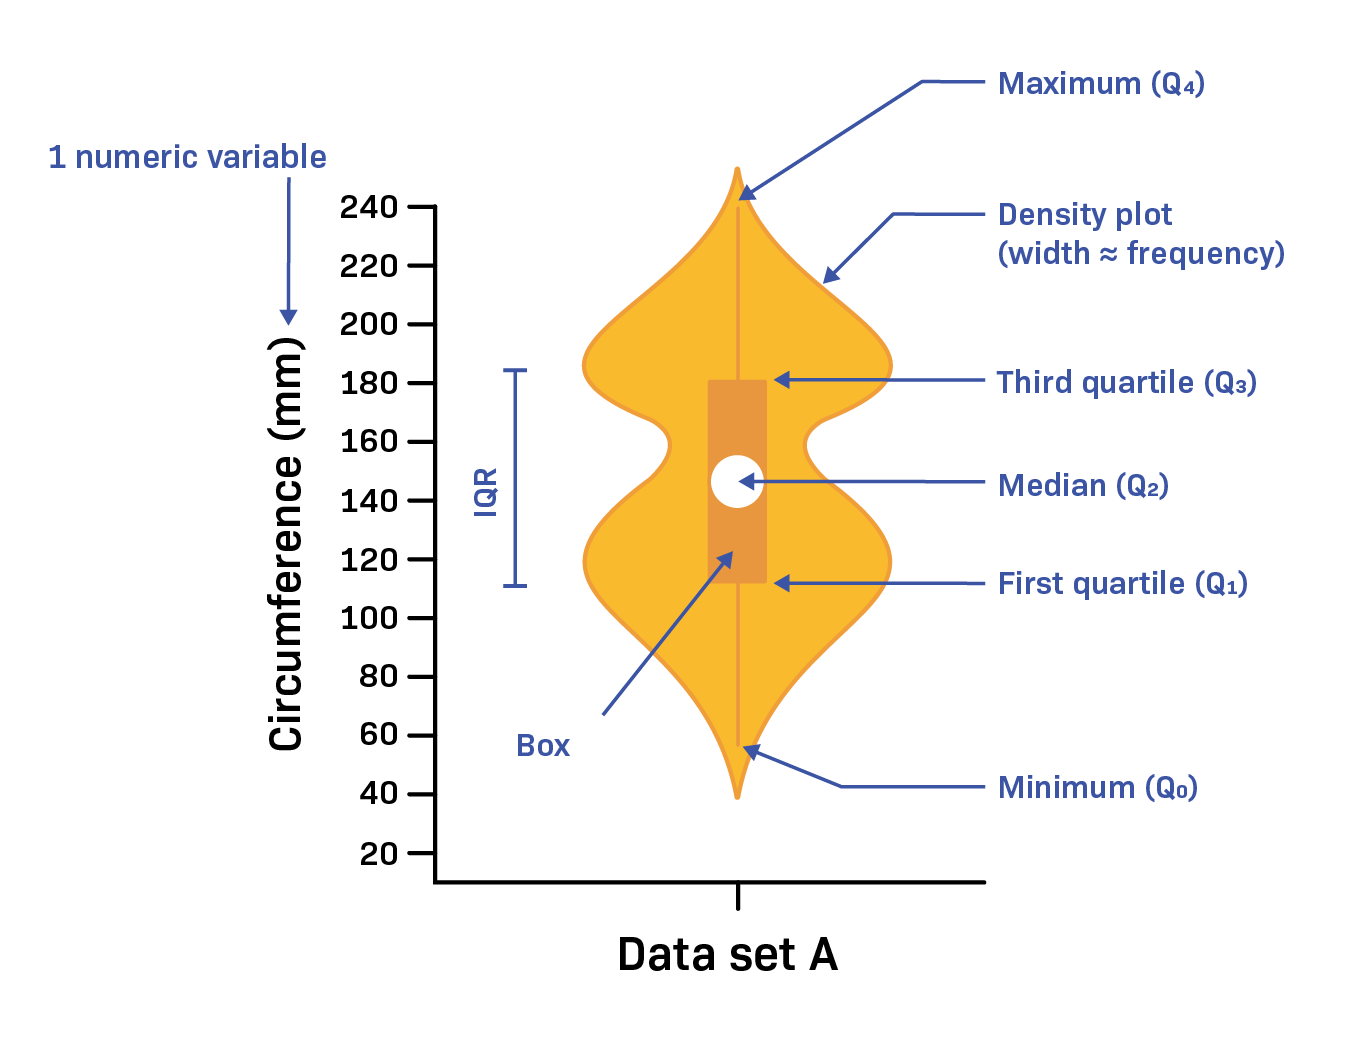

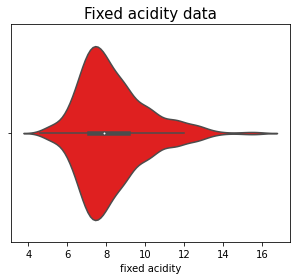

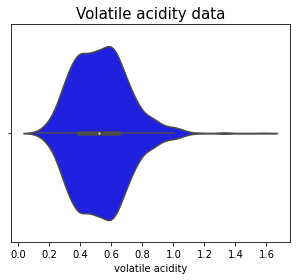

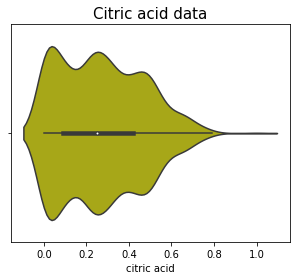

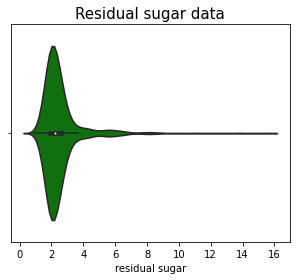

In [ ]:
#Fixed Acid Data
plt.figure(figsize=(5,4))
sns.violinplot(x="fixed acidity",data=wine_df,color="r")
plt.title("Fixed acidity data", {"fontsize":15})

#Volatile acidity
plt.figure(figsize=(5,4))
sns.violinplot(x='volatile acidity',data=wine_df,color='b');
plt.title("Volatile acidity data",{'fontsize':15});

#Sitrik asit
plt.figure(figsize=(5,4))
sns.violinplot(x='citric acid',data=wine_df,color='y');
plt.title("Citric acid data",{'fontsize':15});

#Residual Sugar Data
plt.figure(figsize=(5,4))
sns.violinplot(x='residual sugar',data=wine_df,color='g');
plt.title("Residual sugar data",{'fontsize':15});

# Data

In [ ]:
wine_df.head()
print('The description of the given data: \n')
print({wine_df.info()})


The description of the given data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
{None}


In [ ]:
# corr( X ) returns a matrix of the pairwise linear correlation coefficient between each pair of columns in the input matrix X
wine_df.corr().style.background_gradient(cmap = 'Purples')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


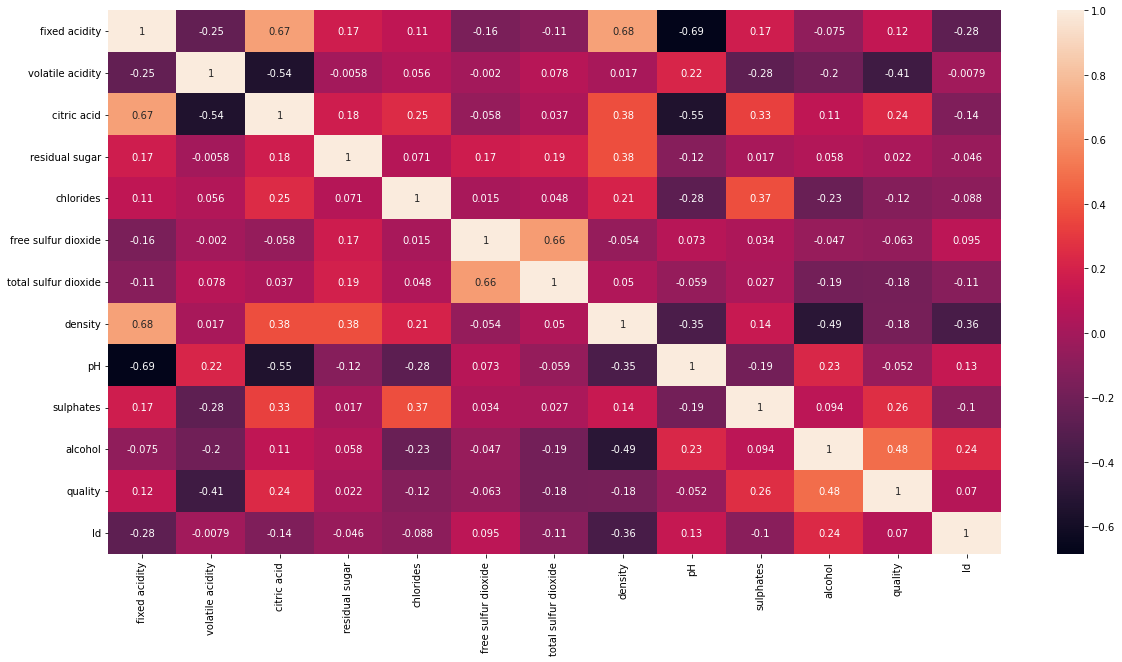

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(wine_df.corr(), annot=True)

## **Model building**

In [ ]:
wine_df.drop('Id', axis=1, inplace=True)
X = wine_df.drop('quality',axis=1)
y = wine_df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101);
print(f'Shape of the X_train: {X_train.shape}');
print(f'Shape of the X_test: {X_test.shape}');
print(f'Shape of the y_train: {y_train.shape}');
print(f'Shape of the y_test: {y_test.shape}');

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
  print("Starting...")
  ss = StandardScaler()  #Standardization, or mean removal and variance scaling
  X_train_ss = ss.fit_transform(X_train)
  X_test_ss = ss.fit_transform(X_test)
  print("Scaling process is done.")

  mod = model.fit(X_train_ss, y_train)
  mod_pred = model.predict(X_test_ss)

  print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
  print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
  print("Accuracy of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
  print("Evaluation process is done ...")
  return mod

  ### _ss olanları neden kullanmadık onları kullanarak hazırlmayı dene bu işlem bittince

# **Classifications**


In [ ]:
#Random Forrest => wisdom of crowds
#A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models

rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Starting...
Scaling process is done.
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.71      0.75      0.73       102
           6       0.61      0.65      0.63        91
           7       0.61      0.52      0.56        27
           8       1.00      0.50      0.67         2

    accuracy                           0.66       229
   macro avg       0.49      0.40      0.43       229
weighted avg       0.64      0.66      0.65       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  4  2  0  0]
 [ 0  0 77 25  0  0]
 [ 0  0 24 59  8  0]
 [ 0  0  2 11 14  0]
 [ 0  0  0  0  1  1]]
Accuracy of the Model: 
0.6593886462882096
Evaluation process is done ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier()

In [ ]:
#Decision Tree Classifier()

dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Starting...
Scaling process is done.
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.17      0.20         6
           5       0.72      0.75      0.73       102
           6       0.63      0.56      0.59        91
           7       0.42      0.52      0.47        27
           8       0.20      0.50      0.29         2

    accuracy                           0.62       229
   macro avg       0.37      0.42      0.38       229
weighted avg       0.63      0.62      0.62       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  1  2  3  0  0]
 [ 0  3 76 20  3  0]
 [ 0  0 23 51 15  2]
 [ 0  0  4  7 14  2]
 [ 0  0  0  0  1  1]]
Accuracy of the Model: 
0.6244541484716157
Evaluation process is done ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier()

In [ ]:
#Support Vector Machine

svc = svm.SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting...
Scaling process is done.
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.79      0.75       102
           6       0.61      0.68      0.65        91
           7       0.67      0.37      0.48        27
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.33      0.31      0.31       229
weighted avg       0.64      0.67      0.65       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  4  2  0  0]
 [ 0  0 81 21  0  0]
 [ 0  0 24 62  5  0]
 [ 0  0  3 14 10  0]
 [ 0  0  0  2  0  0]]
Accuracy of the Model: 
0.6681222707423581
Evaluation process is done ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC()

In [ ]:
xgb = xgboost.XGBClassifier()
model_evaluation(xgb, X_train, y_train, X_test, y_test)

Starting...
Scaling process is done.
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.73      0.72      0.72       102
           6       0.60      0.70      0.65        91
           7       0.52      0.41      0.46        27
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.31      0.30      0.30       229
weighted avg       0.62      0.65      0.63       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0 73 29  0  0]
 [ 0  0 18 64  9  0]
 [ 0  0  3 12 11  1]
 [ 0  0  0  1  1  0]]
Accuracy of the Model: 
0.6462882096069869
Evaluation process is done ...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier(objective='multi:softprob')

**Random Forrest Classifier:** 

Accuracy of the Model: 
0.6812227074235808

**Decision Tree Classifier:**

Accuracy of the Model: 
0.62882096069869

**Support Vector Machine Classifier:**

Accuracy of the Model: 
0.6681222707423581

**XGBoost Classifier:**

Accuracy of the Model: 
0.6462882096069869

# Model with Pytorch#

In [ ]:
n_rows,n_cols=wine_df.shape
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.bn1 = nn.BatchNorm2d(n_cols-1)
    self.dense1 = nn.Linear(n_cols-1 ,128)
    self.dropout1 = nn.Dropout3d(0.4)

    self.bn2 = nn.BatchNorm2d(n_cols-1)
    self.dense2 = nn.Linear(128 ,128)
    self.dropout2 = nn.Dropout3d(0.4)

    self.bn3 = nn.BatchNorm2d(n_cols-1)
    self.dense3 = nn.Linear(128 ,128)
    
    self.bn4 = nn.BatchNorm2d(n_cols-1)
    self.dense4 = nn.Linear(128, 1)


  def forward(self, x):
    x = self.bn1(x)
    x = self.dense1(x)
    x = F.relu(x)
    x = self.dropout1(x)

    x = self.bn2(x)
    x = self.dense2(x)
    x = F.relu(x)

    x = self.bn3(x)
    x = self.dense3(x)
    x = F.relu(x)

    x = self.bn4(x)
    x = self.dense4(x)

    out = torch.softmax(x,1)
    return out

In [ ]:
model = MyModel()
learning_rate = 0.001
num_epochs = 5
loss = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
print(model)

MyModel(
  (bn1): BatchNorm2d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense1): Linear(in_features=11, out_features=128, bias=True)
  (dropout1): Dropout3d(p=0.4, inplace=False)
  (bn2): BatchNorm2d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense2): Linear(in_features=128, out_features=128, bias=True)
  (dropout2): Dropout3d(p=0.4, inplace=False)
  (bn3): BatchNorm2d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense3): Linear(in_features=128, out_features=128, bias=True)
  (bn4): BatchNorm2d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense4): Linear(in_features=128, out_features=1, bias=True)
)
